In [4]:
# install.packages('geojsonio')

library(tidyverse)
library(sf)


The downloaded binary packages are in
	/var/folders/rj/nvw1tmt94k1cll63pndh19nr0000gn/T//RtmprHNEIQ/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Linking to GEOS 3.7.2, GDAL 2.4.2, PROJ 5.2.0



In [5]:
Rxdeploy <- read_csv("../data/deployments.csv") #receiver station info

Rxdeploy

Parsed with column specification:
cols(
  .default = col_double(),
  station = col_character(),
  glatos_array = col_character(),
  intend_lat = col_logical(),
  intend_long = col_logical(),
  recover_lat = col_logical(),
  recover_long = col_logical(),
  deploy_date_time = col_datetime(format = ""),
  recover_date_time = col_datetime(format = ""),
  ins_model_no = col_character(),
  deployed_by = col_logical(),
  comments = col_logical(),
  glatos_seasonal = col_character(),
  glatos_project = col_character(),
  glatos_vps = col_character()
)

See spec(...) for full column specifications.



station,glatos_array,station_no,consecutive_deploy_no,intend_lat,intend_long,deploy_lat,deploy_long,recover_lat,recover_long,⋯,riser_length,instrument_depth,ins_model_no,glatos_ins_frequency,ins_serial_no,deployed_by,comments,glatos_seasonal,glatos_project,glatos_vps
<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>
WHT-009,WHT,9,1,NA,NA,43.74216,-82.50791,NA,NA,⋯,NA,NA,VR2W,69,109450,NA,NA,NO,HECWL,NO
FDT-001,FDT,1,2,NA,NA,45.93014,-83.50204,NA,NA,⋯,NA,NA,VR3,69,442,NA,NA,No,DRMLT,No
FDT-004,FDT,4,2,NA,NA,45.94764,-83.48847,NA,NA,⋯,NA,NA,VR3,69,441,NA,NA,No,DRMLT,No
FDT-003,FDT,3,2,NA,NA,45.93794,-83.46884,NA,NA,⋯,NA,NA,VR3,69,444,NA,NA,No,DRMLT,No
FDT-002,FDT,2,2,NA,NA,45.92377,-83.48483,NA,NA,⋯,NA,NA,VR3,69,447,NA,NA,No,DRMLT,No
DTR-001,DTR,1,2,NA,NA,45.97745,-83.89740,NA,NA,⋯,NA,NA,VR3,69,439,NA,NA,No,DRMLT,No
DTR-002,DTR,2,2,NA,NA,45.97678,-83.88741,NA,NA,⋯,NA,NA,VR3,69,445,NA,NA,No,DRMLT,No
DTR-003,DTR,3,2,NA,NA,45.99793,-83.87854,NA,NA,⋯,NA,NA,VR3,69,440,NA,NA,No,DRMLT,No
DTR-004,DTR,4,2,NA,NA,45.99861,-83.89160,NA,NA,⋯,NA,NA,VR3,69,446,NA,NA,No,DRMLT,No


In [6]:
# Now lets convert this tibble into a spatial object
rec_sf <-
  Rxdeploy %>% 
  st_as_sf(coords = c("deploy_long", "deploy_lat")) ## specify which columns contain the longitude and latitude data

In [7]:
rec_sf

station glatos_array station_no consecutive_deploy_no intend_lat
1   WHT-009 WHT           9         1                     NA        
2   FDT-001 FDT           1         2                     NA        
3   FDT-004 FDT           4         2                     NA        
4   FDT-003 FDT           3         2                     NA        
5   FDT-002 FDT           2         2                     NA        
6   DTR-001 DTR           1         2                     NA        
7   DTR-002 DTR           2         2                     NA        
8   DTR-003 DTR           3         2                     NA        
9   DTR-004 DTR           4         2                     NA        
10  LVD-001 LVD           1         1                     NA        
11  GRD-001 GRD           1         5                     NA        
12  MAU-003 MAU           3         2                     NA        
13  SBO-039 SBO          39         1                     NA        
14  FMP-002 FMP           2         2                     NA        
15  FMP-003 FMP           3         2                     NA        
16  SCL-008 SCL           8         1                     NA        
17  SBO-001 SBO           1         2                     NA        
18  SBO-002 SBO           2         2                     NA        
19  SBO-003 SBO           3         2                     NA        
20  SBO-004 SBO           4         2                     NA        
21  SBO-005 SBO           5         3                     NA        
22  SBO-006 SBO           6         2                     NA        
23  SBO-007 SBO           7         2                     NA        
24  SBO-008 SBO           8         2                     NA        
25  SBI-004 SBI           4         3                     NA        
26  SBI-007 SBI           7         2                     NA        
27  SBI-008 SBI           8         2                     NA        
28  SBI-009 SBI           9         2                     NA        
29  SBI-010 SBI          10         2                     NA        
30  SBI-011 SBI          11         2                     NA        
⋮   ⋮       ⋮            ⋮          ⋮                     ⋮         
869 TOI-027 TOI          27         8                     NA        
870 TOI-040 TOI          40         6                     NA        
871 TOI-041 TOI          41         6                     NA        
872 TOI-042 TOI          42         6                     NA        
873 WEG-028 WEG          28         8                     NA        
874 WEG-029 WEG          29         8                     NA        
875 CE2-038 CE2          38         6                     NA        
876 CE3-037 CE3          37         6                     NA        
877 EMA-014 EMA          14         8                     NA        
878 EMB-013 EMB          13         8                     NA        
879 FDS-069 FDS          69         3                     NA        
880 JAS-062 JAS          62         3                     NA        
881 JAS-065 JAS          65         3                     NA        
882 CHB-002 CHB           2         8                     NA        
883 EMD-080 EMD          80         7                     NA        
884 GAT-018 GAT          18         8                     NA        
885 GAT-021 GAT          21         8                     NA        
886 SCM-001 SCM           1         2                     NA        
887 SCM-002 SCM           2         2                     NA        
888 DRF-006 DRF           6         1                     NA        
889 DRL-001 DRL           1         2                     NA        
890 DRL-005 DRL           5         3                     NA        
891 DRL-006 DRL           6         3                     NA        
892 DRL-007 DRL           7         3                     NA        
893 DRL-002 DRL           2         3                     NA        
894 DRL-011 DRL          11         3                     NA        
89

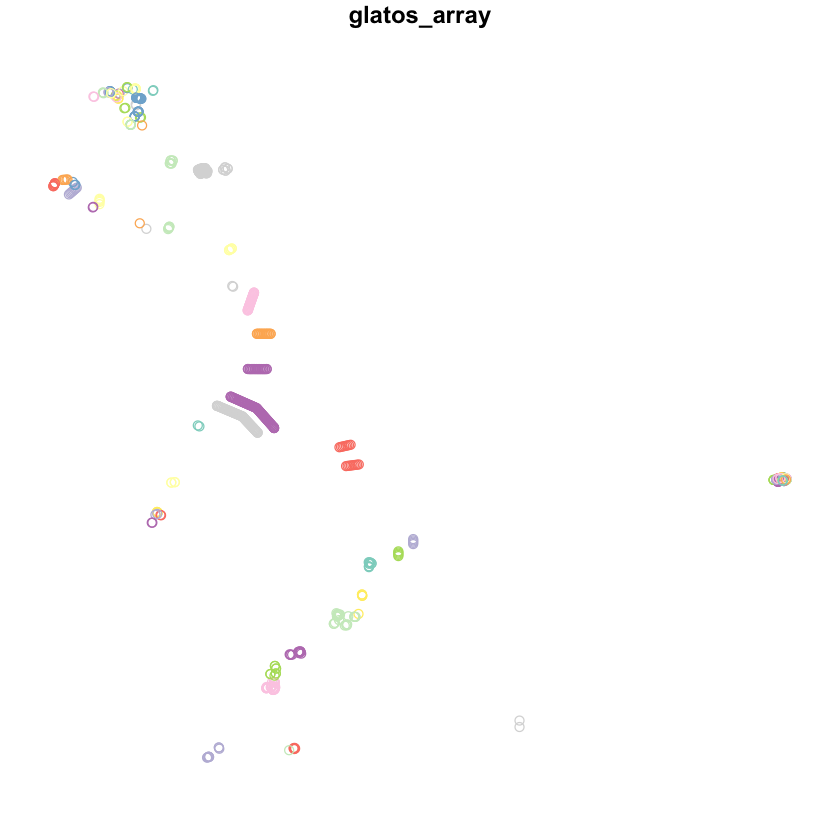

In [8]:
plot(rec_sf["glatos_array"])

station glatos_array station_no consecutive_deploy_no intend_lat
1   WHT-009 WHT           9         1                     NA        
2   FDT-001 FDT           1         2                     NA        
3   FDT-004 FDT           4         2                     NA        
4   FDT-003 FDT           3         2                     NA        
5   FDT-002 FDT           2         2                     NA        
6   DTR-001 DTR           1         2                     NA        
7   DTR-002 DTR           2         2                     NA        
8   DTR-003 DTR           3         2                     NA        
9   DTR-004 DTR           4         2                     NA        
10  LVD-001 LVD           1         1                     NA        
11  GRD-001 GRD           1         5                     NA        
12  MAU-003 MAU           3         2                     NA        
13  SBO-039 SBO          39         1                     NA        
14  FMP-002 FMP           2         2                     NA        
15  FMP-003 FMP           3         2                     NA        
16  SCL-008 SCL           8         1                     NA        
17  SBO-001 SBO           1         2                     NA        
18  SBO-002 SBO           2         2                     NA        
19  SBO-003 SBO           3         2                     NA        
20  SBO-004 SBO           4         2                     NA        
21  SBO-005 SBO           5         3                     NA        
22  SBO-006 SBO           6         2                     NA        
23  SBO-007 SBO           7         2                     NA        
24  SBO-008 SBO           8         2                     NA        
25  SBI-004 SBI           4         3                     NA        
26  SBI-007 SBI           7         2                     NA        
27  SBI-008 SBI           8         2                     NA        
28  SBI-009 SBI           9         2                     NA        
29  SBI-010 SBI          10         2                     NA        
30  SBI-011 SBI          11         2                     NA        
⋮   ⋮       ⋮            ⋮          ⋮                     ⋮         
869 TOI-027 TOI          27         8                     NA        
870 TOI-040 TOI          40         6                     NA        
871 TOI-041 TOI          41         6                     NA        
872 TOI-042 TOI          42         6                     NA        
873 WEG-028 WEG          28         8                     NA        
874 WEG-029 WEG          29         8                     NA        
875 CE2-038 CE2          38         6                     NA        
876 CE3-037 CE3          37         6                     NA        
877 EMA-014 EMA          14         8                     NA        
878 EMB-013 EMB          13         8                     NA        
879 FDS-069 FDS          69         3                     NA        
880 JAS-062 JAS          62         3                     NA        
881 JAS-065 JAS          65         3                     NA        
882 CHB-002 CHB           2         8                     NA        
883 EMD-080 EMD          80         7                     NA        
884 GAT-018 GAT          18         8                     NA        
885 GAT-021 GAT          21         8                     NA        
886 SCM-001 SCM           1         2                     NA        
887 SCM-002 SCM           2         2                     NA        
888 DRF-006 DRF           6         1                     NA        
889 DRL-001 DRL           1         2                     NA        
890 DRL-005 DRL           5         3                     NA        
891 DRL-006 DRL           6         3                     NA        
892 DRL-007 DRL           7         3                     NA        
893 DRL-002 DRL           2         3                     NA        
894 DRL-011 DRL          11         3                     NA        
89

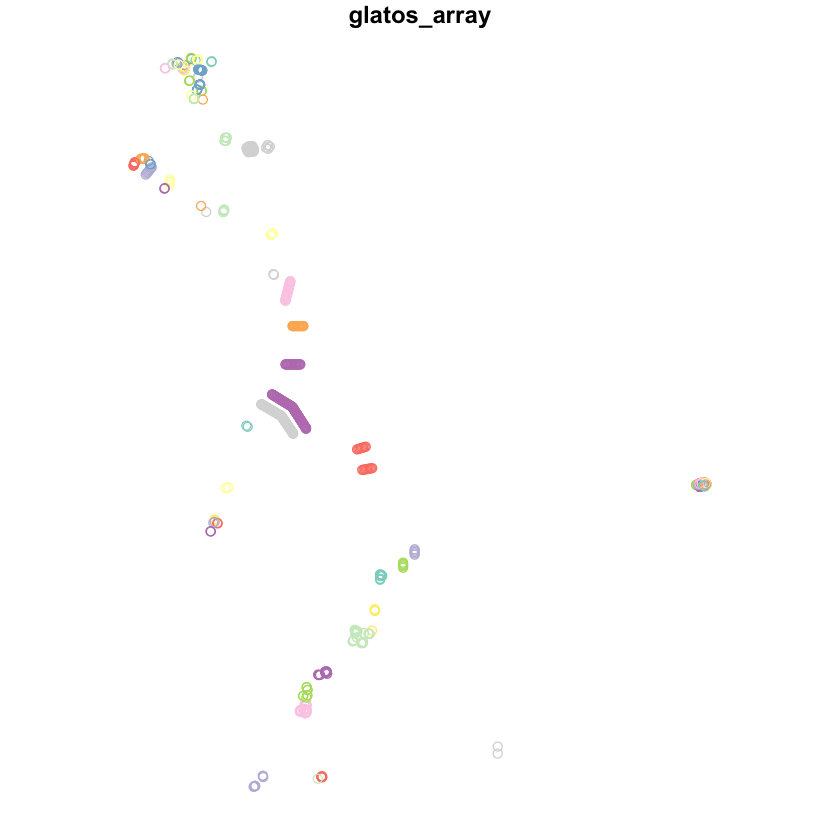

In [9]:
rec_sf <-
  Rxdeploy %>% 
  st_as_sf(coords = c("deploy_long", "deploy_lat"),
           crs = 4326)    ## specify your epsg code in the crs parameter 

rec_sf

plot(rec_sf["glatos_array"])

In [10]:
library(mapview)

In [9]:
mapshot(mapview(rec_sf), url="rec_sf.html")

In [10]:
mapshot(mapview(rec_sf, 
        zcol = "glatos_project",
        burst = TRUE), url="rec_sf_with_zcol.html")

<h2>Links to maps</h2><br>
<p>Please ensure you have run the 2 mapshot functions. Shift/CTRL/CMD-click to open in new tab</p><br>
<a href="rec_sf.html" target="_blank" >Rec SF</a><br>
<a href="rec_sf_with_zcol.html" target="_blank">Rec SF by Animal ID</a>


In [14]:
mapview(rec_sf)